In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
saldo = pd.read_csv("rata_saldo.csv", index_col = 'user_id')

In [99]:
saldo

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Pred
user_id,,,,,,,,,,,,,
1,2.482803e+08,9.808536e+07,1.433262e+07,2.415064e+07,3.817795e+07,1.137887e+08,1.103859e+08,6.460641e+07,1.404914e+08,1.800101e+08,4.014500e+07,4.319305e+07,8.698298e+07
2,2.910268e+07,3.290131e+07,3.738474e+07,4.461204e+07,4.496016e+07,4.834929e+07,5.111184e+07,4.252802e+07,4.742715e+07,5.149798e+07,5.506891e+07,5.936077e+07,6.374297e+07
3,3.501922e+08,1.500205e+08,1.501643e+08,1.502775e+08,1.870736e+08,2.541371e+08,1.834302e+08,1.847366e+08,3.156683e+08,3.634146e+08,3.483774e+08,3.483535e+08,3.295249e+08
4,6.753324e+08,6.127261e+09,2.296937e+09,2.509208e+09,5.956352e+08,2.464698e+09,1.560740e+09,1.578732e+09,3.298439e+08,8.665000e+07,1.339197e+09,7.268203e+08,6.270551e+08
5,1.162418e+08,6.314865e+07,2.328184e+08,2.979681e+08,1.661979e+08,7.854535e+07,1.012544e+08,6.872417e+07,1.090830e+08,8.760282e+07,5.642475e+07,5.894111e+07,7.142330e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91536,2.218732e+06,2.148509e+06,3.017707e+06,2.962941e+06,2.474270e+06,3.018957e+06,3.370174e+06,3.605364e+06,3.667151e+06,3.642274e+06,3.740230e+06,2.615901e+06,3.233265e+06
91537,3.879169e+06,3.967611e+06,3.967611e+06,3.967611e+06,1.022295e+07,1.445957e+08,2.488646e+08,3.346214e+08,2.225261e+08,1.480647e+08,1.246157e+07,3.062679e+07,4.488933e+06
91538,3.980239e+06,4.081432e+06,4.081432e+06,4.081432e+06,4.081432e+06,4.081432e+06,4.873955e+07,9.264039e+06,9.265573e+06,1.070064e+07,1.484398e+07,7.972610e+06,8.682985e+06


In [160]:
saldo['Mean']=saldo.drop(['Pred'], axis=1).mean(axis=1)
saldo['Median']=saldo.drop(['Pred'], axis=1).median(axis=1)
saldo['Min']=saldo.drop(['Pred'], axis=1).min(axis=1)
saldo['Max']=saldo.drop(['Pred'], axis=1).max(axis=1)
saldo['Std']=saldo.drop(['Pred'], axis=1).std(axis=1)

In [118]:
def mmScale(df, column):
    return (df[column]-df['Min'])/(df['Max']-df['Min'])

def ssScale(df, column):
    return (df[column]-df['Mean'])/df['Std']

In [162]:
sldmm = pd.DataFrame(index=saldo.index)
sldss = pd.DataFrame(index=saldo.index)

In [163]:
cols = ['Mean', 'Median', 'Min', 'Max', 'Std'] 
for col in cols:
    sldmm[col]= mmScale(saldo,col)
    sldss[col]= ssScale(saldo,col)

In [135]:
sldss=sldss.replace([np.inf, -np.inf], np.nan)
sldss=sldss.fillna(0)

sldmm=sldmm.replace([np.inf, -np.inf], np.nan)
sldmm=sldmm.fillna(0)

In [166]:
Xmm=sldmm.values
Xss=sldss.values

In [167]:
from sklearn.cluster import KMeans

In [168]:
clfss=KMeans(n_clusters=5,init='k-means++',random_state=42)
clfss.fit(Xss)

clfmm=KMeans(n_clusters=5,init='k-means++',random_state=42)
clfmm.fit(Xmm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [169]:
yss = clfss.predict(Xss)
ymm = clfmm.predict(Xmm)

In [170]:
sldmm['Class'] = ymm
sldss['Class'] = yss

In [172]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

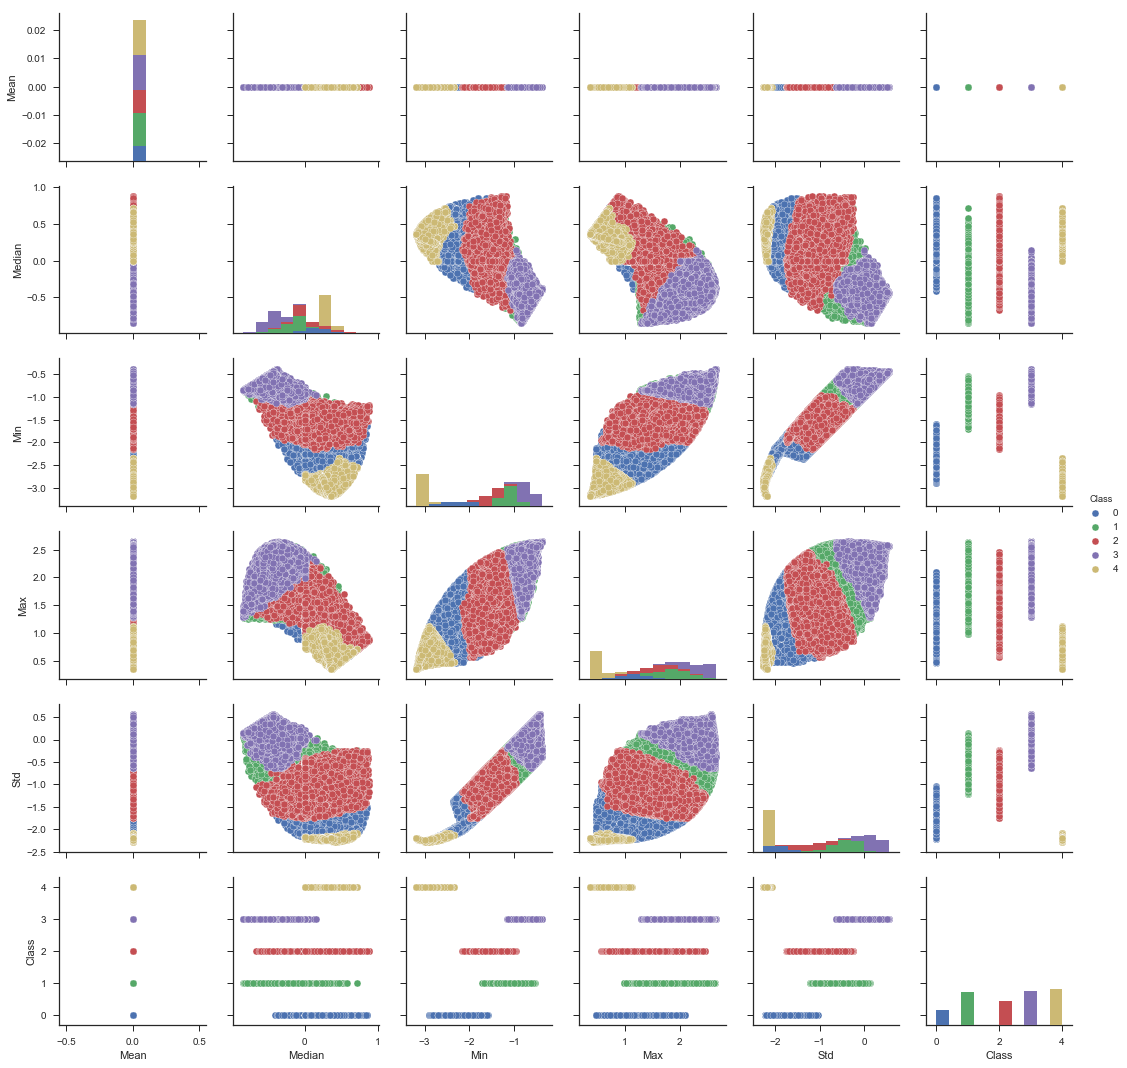

In [173]:
sns.pairplot(sldss, hue="Class")

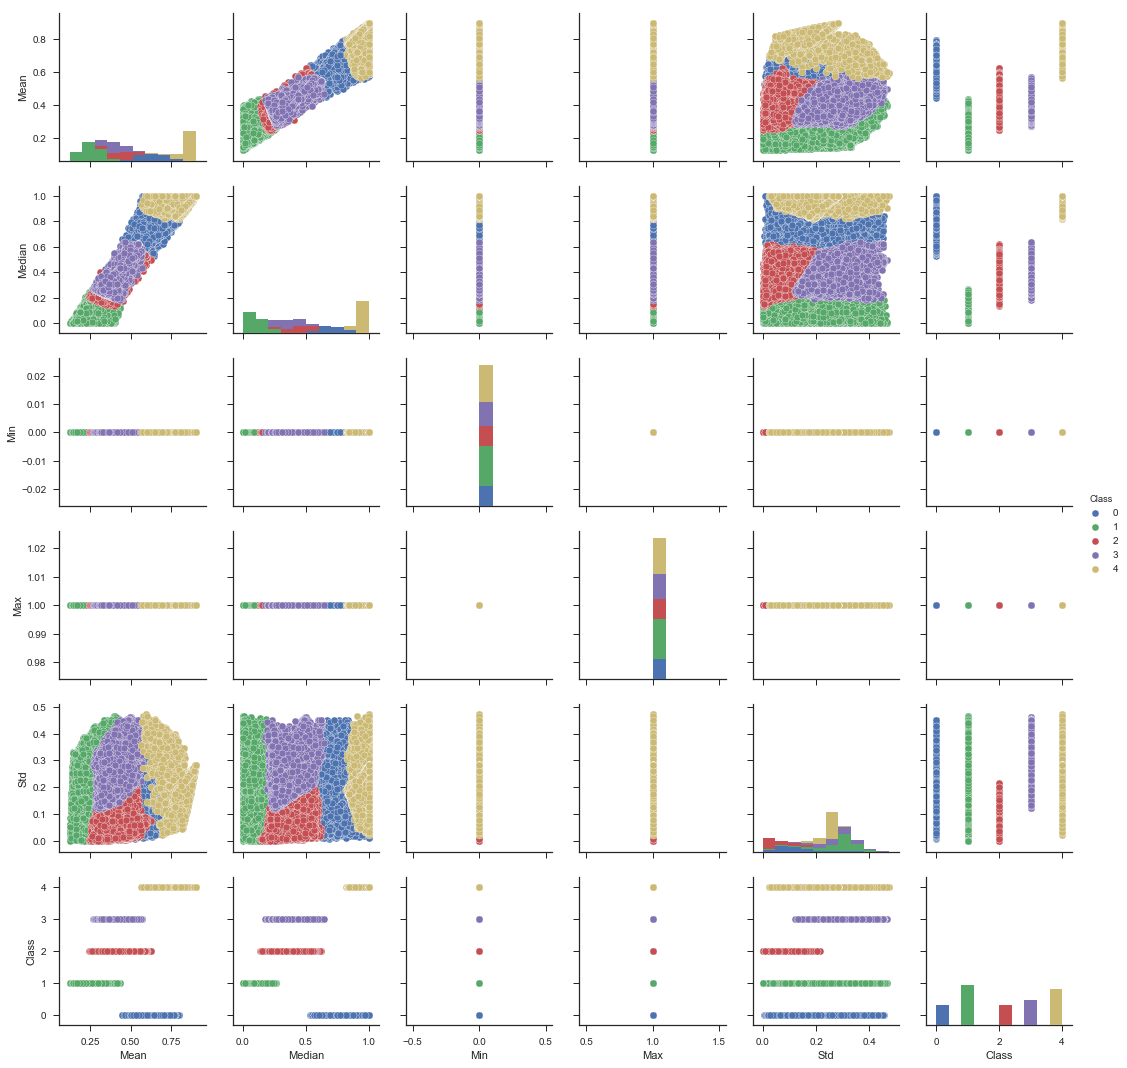

In [174]:
sns.pairplot(sldmm, hue="Class")

In [176]:
sldss.to_csv('sldss.csv')
sldmm.to_csv('sldmm.csv')

In [101]:
X=saldo.loc[:,['Mean', 'Median', 'Min', 'Max', 'Std']].values
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()
mm=MinMaxScaler()
Xss=std.fit_transform(X)
Xmm=mm.fit_transform(X)
sldmm = pd.DataFrame(Xss)
sldss = pd.DataFrame(Xmm)